<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/3_5_3_6_K_means_%26_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.6 *K*-means

*k*-means clustering is a popular method of vector quantization that aims to
partition n observations into $k$ clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster. *k*-means clustering minimizes withincluster
variances (squared Euclidean distances), but not regular Euclidean
distances. While *k*-means general converge quickly to a local optimum, the
problem is computationally difficult (NP-hard). This is shown in Figure 3.12

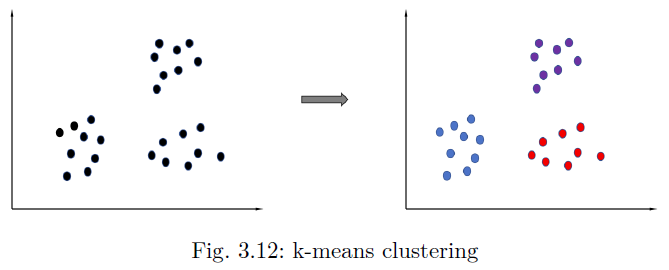

Given a $\left(x_{1}, x_{2}, \ldots x_{n}\right)$ where each observation is a $d$-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k(<n)$ sets $S=$ $\left\{S_{1}, \ldots S_{k}\right\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance), the squared distance of each vector from its centroid summed over all vectors:
$$
\operatorname{WCSS}_{i}=\sum_{x \in S_{i}}\left\|x-\mu\left(S_{i}\right)\right\|^{2}
$$
where $\mu\left(S_{i}\right)$ is the mean of points in $S_{i}$,
$$
\mu(S)=\frac{1}{|S|} \sum_{\mathbf{x} \in S} \mathbf{x}
$$
The objective is to find:
$$
\arg \min _{S} \sum_{i=1}^{k} W C S S_{i}
$$
$K$-means Clustering Algorithm:
1.    Clusters the data into $\mathrm{kgroups}$ where $\mathrm{k}$ is predefined.
2.    Select $\mathrm{k}$ points at random as cluster centers.
3.    Assign objects to their closest cluster center according to the Euclidean distance function.

4.    Calculate the centroid or mean of all objects in each cluster.
5.    Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

We now show that $k$-means converges by proving that $\sum_{i=1}^{k} W C S S_{i}$ monotonically decreases in each iteration. First, $\sum_{i=1}^{k} W C S S_{i}$ decreases in the reassignment step since each vector is assigned to the closest centroid, so the distance it contributes to $\sum_{i=1}^{k} W C S S_{i}$ decreases. Second, it decreases in the recomputation step because the new centroid is the vector $\mathbf{v}$ for which WCSS $_{i}$ reaches its minimum.
$$
\begin{gathered}
\operatorname{WCSS}_{i}(\mathbf{v})=\sum_{\mathbf{x}=\left(x_{j}\right) \in S_{i}}|\mathbf{v}-\mathbf{x}|^{2}=\sum_{\mathbf{x}=\left(x_{j}\right) \in S_{i}} \sum_{j=1}^{d}\left(v_{j}-x_{j}\right)^{2} \\
\frac{\partial \operatorname{WCSS}_{i}(\mathbf{v})}{\partial v_{m}}=\sum_{\mathbf{x}=\left(x_{j}\right) \in S_{i}} 2\left(v_{m}-x_{m}\right)
\end{gathered}
$$
where $x_{m}$ and $v_{m}$ are the $m^{t h}$ components of their respective vectors. Setting the partial derivative to zero, we get:
$$
\mathbf{v}=\frac{1}{\left|S_{i}\right|} \sum_{\mathbf{x}=\left(x_{j}\right) \in S_{i}} x_{j}
$$
which is the componentwise definition of the centroid. Thus, we minimize WCSS $_{i}$ when the old centroid is replaced with the new centroid. The sum of the WCSS $_{i}$, must then also decrease during recomputation.

## *K*-means Clustering in Python

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In this tutorial, we’ll generate our own data using the make_blobs function from the `sklearn.datasets` module. The centers parameter specifies the number of clusters.


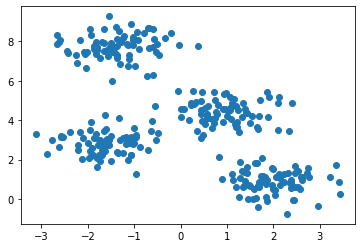

In [43]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the **elbow method**. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the `intertia_` property (WCSS) every time.


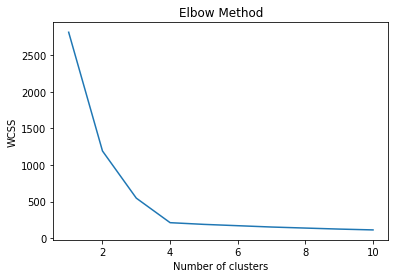

In [44]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next, we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. `k-means++` ensures that you get don’t fall into the random initialization trap.


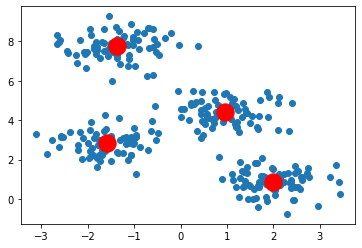

In [45]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# 3.6 Support Vector Machine

Support-vector machines (SVMs) are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

As is shown in Figure 3.13, We are given a training dataset of $n$ points of the form
$$
\left(\mathbf{x}_{1}, y_{1}\right), \ldots,\left(\mathbf{x}_{n}, y_{n}\right)
$$

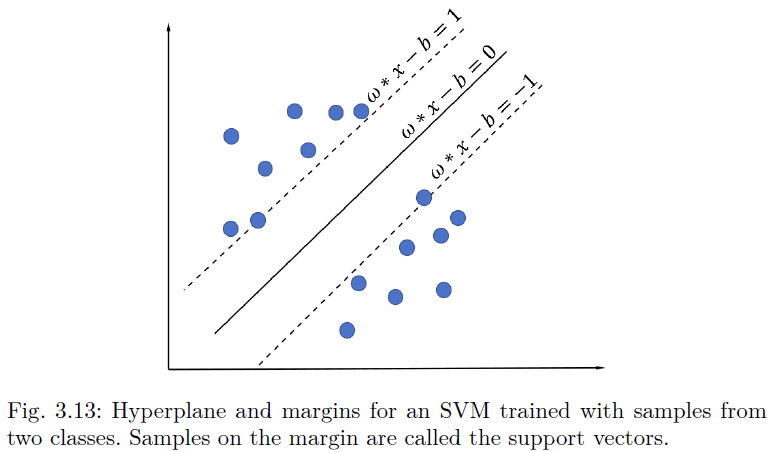

, where the $y_{i}$ are either 1 or $-1$, each indicating the class to which the point $x_{i}$ belongs. Each $x_{i}$ is a $p$-dimensiona real vector. We want to maximize the margin distance of hyperplanes that divides the group of points $x_{i}$ for which $y_{i}=1$ from the group of points for which $y_{i}=-1$. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
A hyperplane can be written as the set of points $\mathbf{x}$ satisfying
$$
\mathbf{w}^{T} \mathbf{x}-b=0
$$
where $\mathbf{w}$ is the normal vector to the hyperplane. If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximummargin hyperplane is the hyperplane that lies halfway between them as in Figure 3.13. We are interested in two regions: anything on or above this boundary is of one class, with label 1 and anything on or below this boundary is of the other class, with label $-1$. The two hyperplanes can be respectively described by the equations
$$
\mathbf{w}^{T} \mathbf{x}-b=1
$$
and
$$
\mathbf{w}^{T} \mathbf{x}-b=-1
$$
We wish all data points to fall into the margin, which can be expressed as for each $i$ either
$$
\mathbf{w}^{T} \mathbf{x}_{i}-b \geq 1, \text { if } y_{i}=1
$$

$$
\mathbf{w}^{T} \mathbf{x}_{i}-b \leq-1, \text { if } y_{i}=-1
$$
Together the two constraints that each data point must lie on the correct side of the margin, can be rewritten as
$$
y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}-b\right) \geq 1, \text { for all } 1 \leq i \leq n
$$
TVe can put this together to get the optimization problem. The goal of the optimization then is to minimize
$$
\min _{\mathbf{w}, \mathbf{b}}\langle\underbrace{\lambda\|\mathbf{w}\|^{2}}_{\text {regularizer }}+\frac{1}{n} \underbrace{\sum_{i=1}^{n} \max \left\{0,1-y_{i}\left(\left\langle\mathbf{w}, \mathbf{x}_{i}\right\rangle-b\right)\right\}}_{\text {error term }}\rangle
$$
which minimizes $\|\mathbf{w}\|$ subject to $y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}-b\right) \geq 1$, for all $1 \leq i \leq n$. The first term above is called the regularization term which arises directly from the margin. The parameter $\lambda$ adjusts the trade-off between increasing the margin size and ensuring that $\mathbf{x}_{i}$ lie on the correct side of the margin while we choose the distance of two hyperplanes to be $2 /\|\mathbf{w}\|$.

In principle, the unconstrained optimization problem can be directly solved with gradient descent methods. Because this function is convex in the $\mathbf{w}$ we can easily apply a gradient descent method to find the minimum. For example. with stochastic gradient descent pick an $i$ at random and update according to

New $b=$ Old $b-\beta \begin{cases}y_{i}, & \text { if } 1-y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}-b\right)>0 \\ 0, & \text { otherwise }\end{cases}$ and

New $\mathbf{w}=\mathrm{Old} \mathbf{w}-\beta \begin{cases}2 \lambda \mathbf{w}-\frac{1}{n} y_{i} \mathbf{x}_{i}, & \text { if } 1-y_{i}\left(\mathbf{w}^{T} \mathrm{x}_{i}-b\right)>0 \\ 2 \lambda \mathbf{w}, & \text { otherwise }\end{cases}$

## Support Vector Machine in Python 

In [1]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Then, we define our SVM class. As we mentioned previously, instead of using gradient descent to find the best fitting line as in the case of Linear Regression, we can directly solve for w and b using the Lagrangian.


In [26]:
class SVM:
  def fit(self, X, y):
        n_samples, n_features = X.shape
        
  # P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
                
        P = cvxopt.matrix(np.outer(y, y) * K)
  
  # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)

  # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))

  # b = 0 
        b = cvxopt.matrix(0.0)

  # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))

  # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
      
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
  
  # Lagrange multipliers
        a = np.ravel(solution['x'])
        
  # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
  # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        
  # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        
  def project(self, X):
      return np.dot(X, self.w) + self.b


  def predict(self, X):
      return np.sign(self.project(X))

To keep things simple, we’ll use the scikit-learn library to generate linearly separable data. We label the negative samples as -1 instead of 0. cvxopt expects the data to be in a specific format which is why we take an intermediate step.


In [27]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y


Let’s get a feel for the data by plotting it.

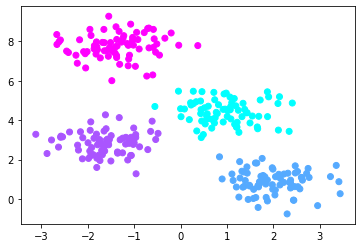

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool')

We split the data into training and testing sets.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Then, we create and train an instance of our support vector machine class.

In [30]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  4e-16  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  6e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  4e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  2e-15  7e-15
Optimal solution found.


Next, we plot the decision boundary and support vectors.


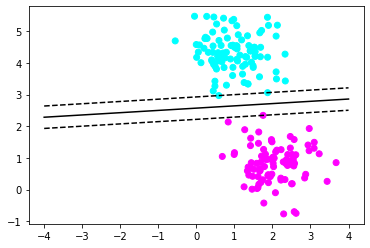

In [48]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
    
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cool')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

We use our model to predict the classes of the samples in the testing set. Given that we’re using our model to classify data, we use a confusion matrix to evaluate its accuracy.


In [32]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]])

Let’s attempt the same thing using the scikit-learn implementation of the support vector classifier.

In [34]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

After training our model, we plot the decision boundary and support vectors.

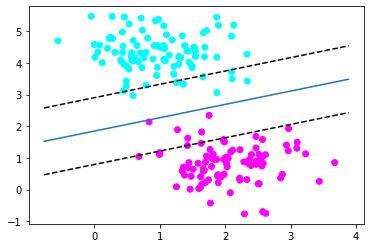

In [50]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cool');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

Again, we predict which sample belongs to what class based off which side of the line they fall.

In [39]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]])

As we can see, the classifier correctly classified every sample.